                     Spot_Price
Datetime                       
2016-01-01 00:00:00    482000.0
2016-01-01 01:00:00    395000.0
2016-01-01 02:00:00    390000.0
2016-01-01 03:00:00    364051.0
2016-01-01 04:00:00    344910.0
...                         ...
2023-06-27 19:00:00    800142.0
2023-06-27 20:00:00    800142.0
2023-06-27 21:00:00    800142.0
2023-06-27 22:00:00    738395.0
2023-06-27 23:00:00    729142.0

[65112 rows x 1 columns]
404496.9005298651
146489.3457175926


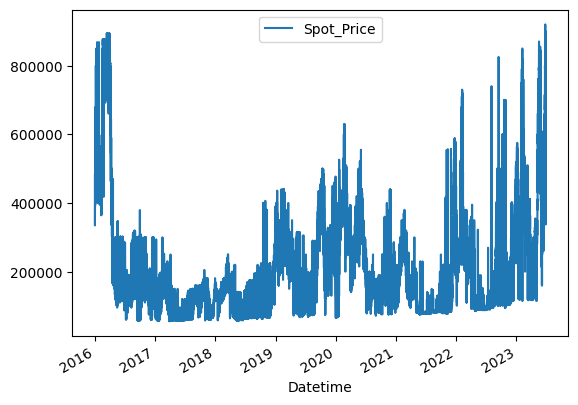

In [51]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
datos = pd.read_csv('spot_price_hourly.csv', index_col=0, parse_dates=True)
print(datos)
datos.plot()

#datos['Spot_Price'].mean() #promedio
#datos['Spot_Price'].median() #mediana
#datos['Spot_Price'].std() #desviación estándar
#print(datos['Spot_Price'].std()/datos['Spot_Price'].mean())


#Q_75=np.percentile(datos['Spot_Price'].values,75)
#Q_25=np.percentile(datos['Spot_Price'].values,25)
#print(Q_75-Q_25)
#print((Q_75-Q_25)/datos['Spot_Price'].median())
#datos['Spot_Price'].quantile(.75)-datos['Spot_Price'].quantile(.25)
print(datos['Spot_Price']['2023'].mean())
print(datos['Spot_Price']['2021'].mean())



In [52]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


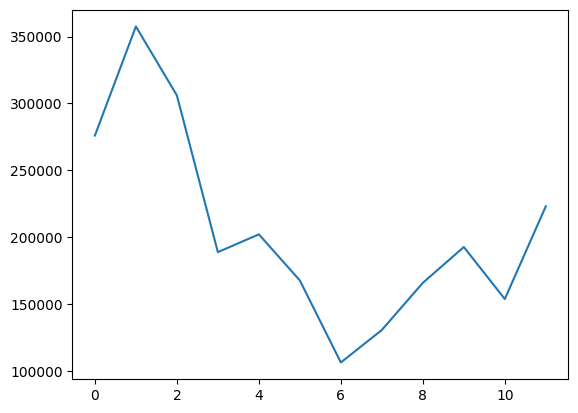

In [53]:
medias=[]
for i in range (1,13):
    medias.append(datos[datos.index.month==i].mean().values[0])
plt.plot(medias)

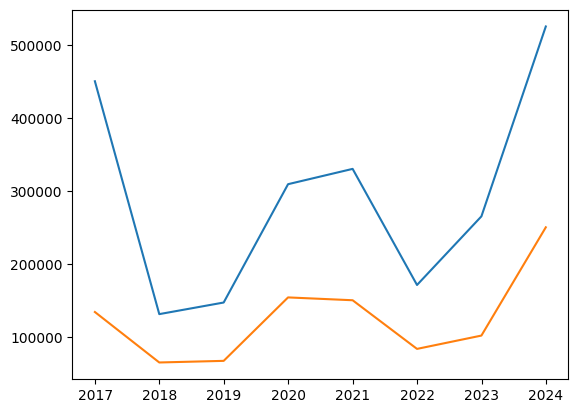

In [54]:
p=datos.resample('Y').quantile(0.75)
q=datos.resample('Y').quantile(0.25)
plt.plot(p)
plt.plot(q)

<Axes: title={'center': 'Valois'}, xlabel='Datetime'>

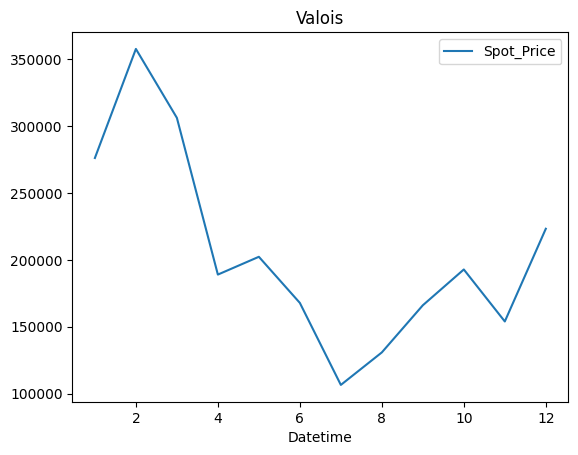

In [55]:
promedio=datos.groupby(datos.index.month).mean()
promedio.plot(title='Valois')


<Axes: xlabel='Datetime'>

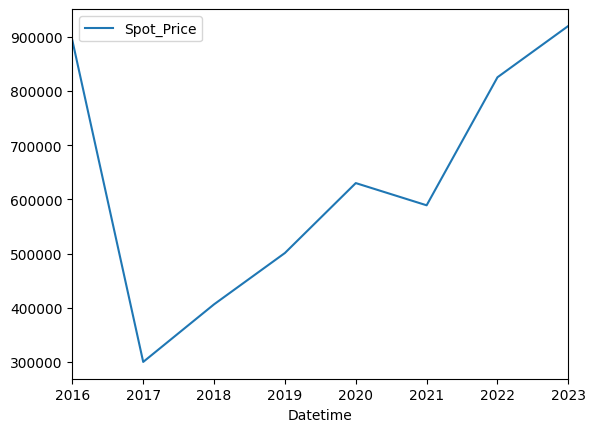

In [56]:
#resample es para cambiar la resolución de los datos, Y es anual, con el max nos saca el max de cada año
promedio=datos.resample("Y").max()
promedio.plot()


Text(0, 0.5, 'Precio de la energía [Kwh]')

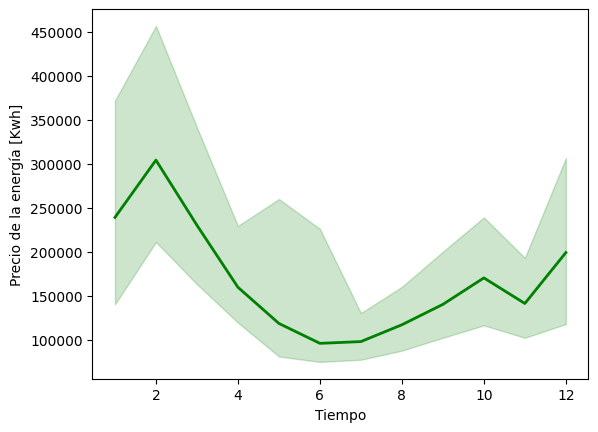

In [58]:
q_75=datos.groupby(datos.index.month).quantile(0.75)
q_25=datos.groupby(datos.index.month).quantile(0.25)
plt.fill_between(q_75.index,q_75['Spot_Price'],q_25['Spot_Price'],alpha=0.2, color="green")
plt.plot(datos.groupby(datos.index.month).median(),lw=2, color='green')
plt.xlabel("Meses del año")
plt.ylabel('Precio de la energía [Kwh]')


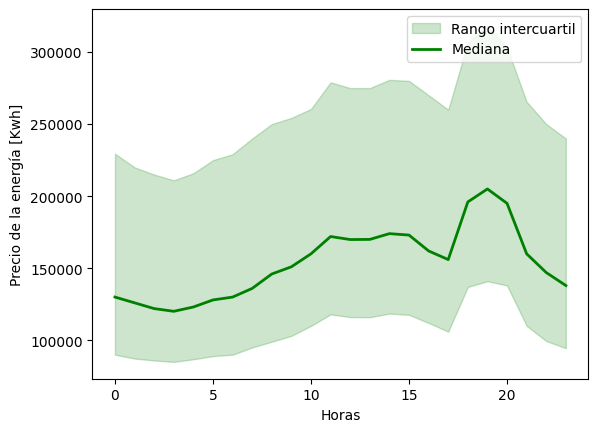

In [67]:
q_75=datos.groupby(datos.index.hour).quantile(0.75)
q_25=datos.groupby(datos.index.hour).quantile(0.25)
plt.fill_between(q_75.index,q_75['Spot_Price'],q_25['Spot_Price'],alpha=0.2, color="green", label='Rango intercuartil')
plt.plot(datos.groupby(datos.index.hour).median(),lw=2, color='green',label='Mediana')
plt.xlabel("Horas")
plt.ylabel('Precio de la energía [Kwh]')
plt.legend()

In [ ]:
#Ciclo anual del ciclo diurno, eje x meses, eje y 0 a 23, gráfica de colores, promedio de ciclo anual, promedio del ciclo diurno